In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_label.csv', delimiter=',').T

X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_label.csv', delimiter=',').T

In [6]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_train: ", X_test.shape)
print("shape of Y_train: ", Y_test.shape)

shape of X_train:  (784, 1000)
shape of Y_train:  (10, 1000)
shape of X_train:  (784, 350)
shape of Y_train:  (10, 350)


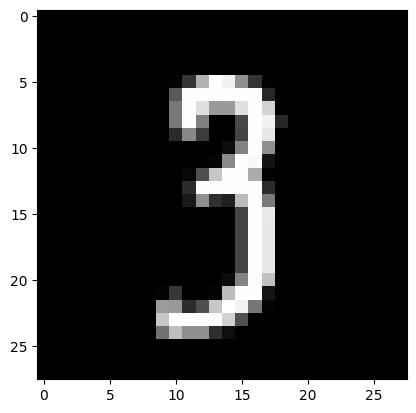

In [27]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Helper function
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX)

In [ ]:
def derivative_tanh(x):
    return (1-np.power(x, 2))

def derivative_relu(x):
    return np.array(x>0, dtype=np.float32)

In [ ]:
# Initialize the parameters

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))

    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1" : w1,
        "w2" : w2,
        "b1" : b1,
        "b2" : b2
    }

    return parameters

In [29]:
# Forward propagation

def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_chache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_chache



In [ ]:
def cost_function(a2, y):
    m = y.shape[1]

    cost = -(1/m)*np.sum(y*np.log(a2))

    return cost

In [ ]:
# Back propogation

